Epoch 1/10, Accuracy: 0.8636
Epoch 2/10, Accuracy: 0.8981
Epoch 3/10, Accuracy: 0.9095
Epoch 4/10, Accuracy: 0.9174
Epoch 5/10, Accuracy: 0.9242
Epoch 6/10, Accuracy: 0.9288
Epoch 7/10, Accuracy: 0.9339
Epoch 8/10, Accuracy: 0.9374
Epoch 9/10, Accuracy: 0.9400
Epoch 10/10, Accuracy: 0.9427


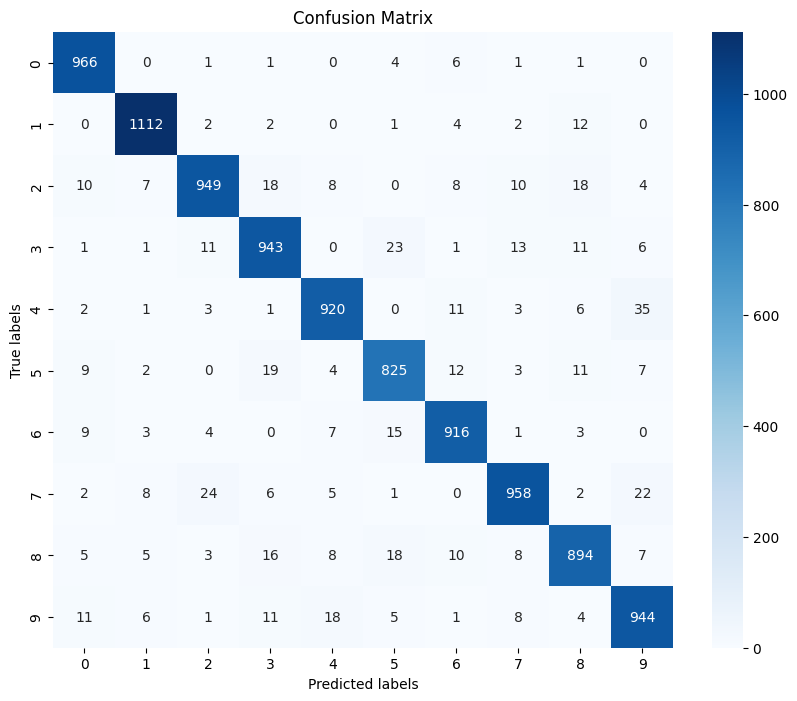

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset using TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input data to 1D vectors
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Define the neural network architecture using only NumPy
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        self.bias2 = np.zeros((1, output_size))
    
    def forward(self, inputs):
        self.z1 = np.dot(inputs, self.weights1) + self.bias1
        self.a1 = np.maximum(0, self.z1)  # ReLU activation
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        exp_scores = np.exp(self.z2)
        self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        return self.probs

    def backward(self, inputs, targets, learning_rate):
        num_samples = inputs.shape[0]
        delta3 = self.probs - targets
        dW2 = np.dot(self.a1.T, delta3) / num_samples
        db2 = np.sum(delta3, axis=0, keepdims=True) / num_samples
        delta2 = np.dot(delta3, self.weights2.T) * (self.a1 > 0)
        dW1 = np.dot(inputs.T, delta2) / num_samples
        db1 = np.sum(delta2, axis=0) / num_samples

        # Update parameters
        self.weights1 -= learning_rate * dW1
        self.bias1 -= learning_rate * db1
        self.weights2 -= learning_rate * dW2
        self.bias2 -= learning_rate * db2

# Define hyperparameters
input_size = 784  # 28x28 pixels flattened
hidden_size = 128
output_size = 10
learning_rate = 0.01
num_epochs = 10
batch_size = 32

# Initialize the neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Train the model
for epoch in range(num_epochs):
    for i in range(0, x_train_flat.shape[0], batch_size):
        batch_x = x_train_flat[i:i+batch_size]
        batch_y = y_train_one_hot[i:i+batch_size]

        # Forward pass
        probs = model.forward(batch_x)
        
        # Backward pass
        model.backward(batch_x, batch_y, learning_rate)
    
    # Compute accuracy at the end of each epoch
    y_pred = np.argmax(model.forward(x_test_flat), axis=1)
    accuracy = np.mean(y_pred == y_test)
    print(f"Epoch {epoch + 1}/{num_epochs}, Accuracy: {accuracy:.4f}")

# Predict labels for the test set
y_pred = np.argmax(model.forward(x_test_flat), axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
